In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# Define the Prothero-Robinson problem
def prothero_robinson(t, y, L, phi_prime):
    return -L * (y - phi(t)) + phi_prime(t)

def phi(t):
    return np.sin(t + np.pi/4)

def phi_prime(t):
    return np.cos(t + np.pi/4)

def exact_solution(t, y0, L):
    return np.exp(-L * t) * (y0 - phi(0)) + phi(t)

In [3]:
def dirk2_2order(y_n, t_n, h, L, phi, phi_prime):
    gamma = 1 - 1/np.sqrt(2)
    
    # First stage
    k1 = (-L*(y_n - phi(t_n + gamma*h)) + phi_prime(t_n + gamma*h)) / (1 + L*h*gamma)
    
    # Second stage
    k2 = (-L*(y_n + h*(1 - gamma)*k1 - phi(t_n + h)) + phi_prime(t_n + h)) / (1 + L*h*gamma)
    
    y_n1 = y_n + h * (gamma * k2 + (1 - gamma) * k1)
    return y_n1

In [4]:
def dirk2_3order(y_n, t_n, h, L, phi, phi_prime):
    gamma = 1/2 + np.sqrt(3)/6
    
    # First stage
    k1 = (-L*(y_n - phi(t_n + gamma*h)) + phi_prime(t_n + gamma*h)) / (1 + L*h*gamma)
    
    # Second stage
    k2 = (-L*(y_n + h*(1 - 2*gamma)*k1 - phi(t_n + (1 - gamma)*h)) + phi_prime(t_n + (1 - gamma)*h)) / (1 + L*h*gamma)
    
    y_n1 = y_n + 0.5*h*(k2 +k1)
    return y_n1

In [5]:
# Function to solve the Prothero-Robinson problem using DIRK2
def solve_prothero_robinson(Tmax, h, L, y0):
    num_steps = int(Tmax / h) + 1
    t_values = np.linspace(0, Tmax, num_steps)
    y_values = np.zeros(num_steps)
    y_values[0] = y0
    
    for i in range(1, num_steps):
        y_values[i] = dirk2_2order(y_values[i-1], t_values[i-1], h, L, phi, phi_prime)
    
    return t_values, y_values

In [6]:
# Function to solve the Prothero-Robinson problem using DIRK2
def solve_prothero_robinson_3(Tmax, h, L, y0):
    num_steps = int(Tmax / h) + 1
    t_values = np.linspace(0, Tmax, num_steps)
    y_values = np.zeros(num_steps)
    y_values[0] = y0
    
    for i in range(1, num_steps):
        y_values[i] = dirk2_3order(y_values[i-1], t_values[i-1], h, L, phi, phi_prime)
    
    return t_values, y_values

In [7]:
# Function to compute the numerical error
def compute_error(t_values, y_numerical, L):
    y_exact = exact_solution(t_values, np.sin(np.pi/4), L)
    error = np.abs(y_numerical - y_exact)
    return np.max(error)

## Part (a)

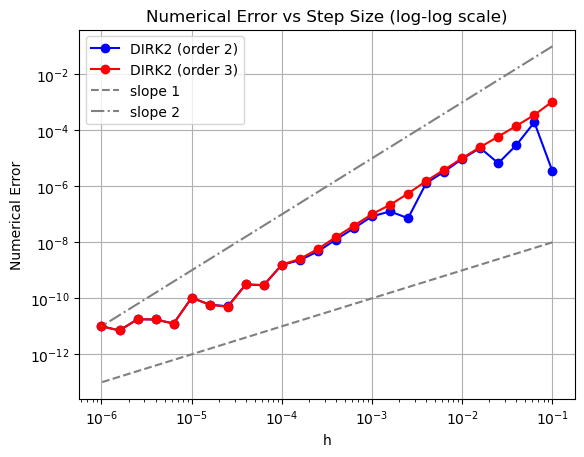

In [8]:
# Set parameters
Tmax = 10
d = 5 / 24
# p_values = np.arange(1, 6+d, d, dtype=float)
p_values = np.arange(1, 6.2, 0.2)
h_values = 1/10**(p_values)

# Initialize arrays to store errors
errors = []

# Compute errors for different step sizes (order 2)
for h in h_values:
    t_values, y_numerical = solve_prothero_robinson(Tmax, h, 10**4, np.sin(np.pi/4))
    error = compute_error(t_values, y_numerical, 10**4)
    errors.append(error)

# Plot the numerical error vs h in log-log scale
plt.loglog(h_values, errors, marker='o', linestyle='-', color='b', label='DIRK2 (order 2)')


errors = []
# Compute errors for different step sizes (order 3)
for h in h_values:
    t_values, y_numerical = solve_prothero_robinson_3(Tmax, h, 10**4, np.sin(np.pi/4))
    error = compute_error(t_values, y_numerical, 10**4)
    errors.append(error)

# Plot the numerical error vs h in log-log scale
plt.loglog(h_values, errors, marker='o', linestyle='-', color='r', label='DIRK2 (order 3)')

# Compute corresponding errors for slopes 1 and 2
C1 = 10**(-7)
C2 = 10
error_C1 = C1 * h_values
error_C2 = C2 * h_values**2
plt.loglog(h_values, error_C1, linestyle='--', color='gray', label='slope 1')
plt.loglog(h_values, error_C2, linestyle='-.', color='gray', label='slope 2')

plt.xlabel('h')
plt.ylabel('Numerical Error')
plt.title('Numerical Error vs Step Size (log-log scale)')
plt.legend()
plt.grid(True)

## Part (b)

In [8]:
# Function to compute the numerical error
def compute_error(t_values, y_numerical, L):
    y_exact = exact_solution(t_values, np.sin(np.pi/4) + 10, L)
    error = np.abs(y_numerical - y_exact)
    return np.max(error)

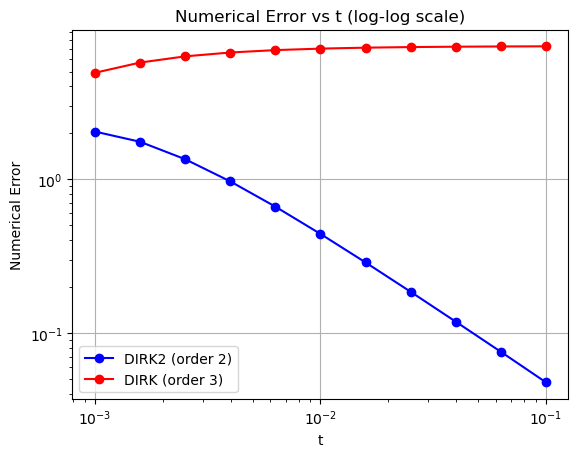

In [10]:
# Set parameters
Tmax = 10
d = 5 / 24
# p_values = np.arange(1, 6+d, d, dtype=float)
p_values = np.arange(1, 3.2, 0.2)
h_values = 1/10**(p_values)

# Initialize arrays to store errors
errors = []

# Compute errors for different step sizes (order 2)
for h in h_values:
    t_values, y_numerical = solve_prothero_robinson(Tmax, h, 10**4, np.sin(np.pi/4) + 10)
    error = compute_error(t_values, y_numerical, 10**4)
    errors.append(error)

# Plot the numerical error vs h in log-log scale
plt.loglog(h_values, errors, marker='o', linestyle='-', color='b', label='DIRK2 (order 2)')

errors = []
# Compute errors for different step sizes (order 3)
for h in h_values:
    t_values, y_numerical = solve_prothero_robinson_3(Tmax, h, 10**4, np.sin(np.pi/4) + 10)
    error = compute_error(t_values, y_numerical, 10**4)
    errors.append(error)

# Plot the numerical error vs h in log-log scale
plt.loglog(h_values, errors, marker='o', linestyle='-', color='r', label='DIRK (order 3)')

# Compute corresponding errors for slopes 1 and 2
C1 = 10**(-7)
C2 = 10
error_C1 = C1 * h_values
error_C2 = C2 * h_values**2
# plt.loglog(h_values, error_C1, linestyle='--', color='gray', label='slope 1')
# plt.loglog(h_values, error_C2, linestyle='-.', color='gray', label='slope 2')

plt.xlabel('t')
plt.ylabel('Numerical Error')
plt.title('Numerical Error vs t (log-log scale)')
plt.legend()
plt.grid(True)

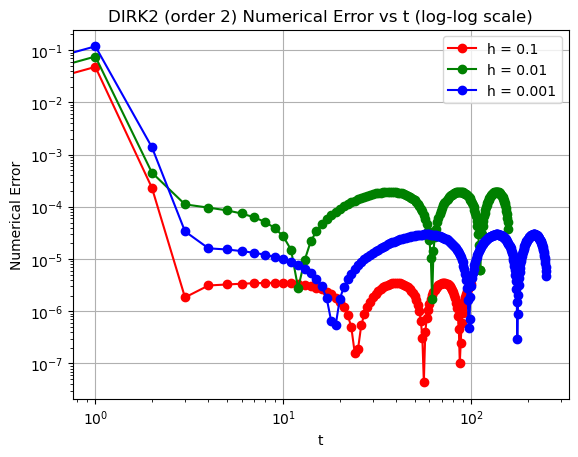

In [11]:
# Set parameters
Tmax = 10
d = 5 / 24
# p_values = np.arange(1, 6+d, d, dtype=float)
p_values = np.arange(1, 3.2, 0.2)
h_values = 1/10**(p_values)

# Initialize arrays to store errors
errors = []

# Compute errors for different step sizes (order 2)
for h in h_values:
    t_values, y_numerical = solve_prothero_robinson(Tmax, h, 10**4, np.sin(np.pi/4) + 10)
    
    y_exact = exact_solution(t_values, np.sin(np.pi/4) + 10 , 10**4)
    error = np.abs(y_numerical - y_exact)
#     error = compute_error(t_values, y_numerical, 10**4)
    errors.append(error)

# Plot the numerical error vs h in log-log scale
plt.loglog(np.arange(len(errors[0])), (errors[0]), marker='o', linestyle='-', color='r', label='h = 0.1')
plt.loglog(np.arange(len(errors[1])), (errors[1]), marker='o', linestyle='-', color='g', label='h = 0.01')
plt.loglog(np.arange(len(errors[2])), (errors[2]), marker='o', linestyle='-', color='b', label='h = 0.001')

# Compute corresponding errors for slopes 1 and 2
C1 = 10**(-7)
C2 = 10
error_C1 = C1 * h_values
error_C2 = C2 * h_values**2
# plt.loglog(h_values, error_C1, linestyle='--', color='gray', label='slope 1')
# plt.loglog(h_values, error_C2, linestyle='-.', color='gray', label='slope 2')

plt.xlabel('t')
plt.ylabel('Numerical Error')
plt.title('DIRK2 (order 2) Numerical Error vs t (log-log scale)')
plt.legend()
plt.grid(True)

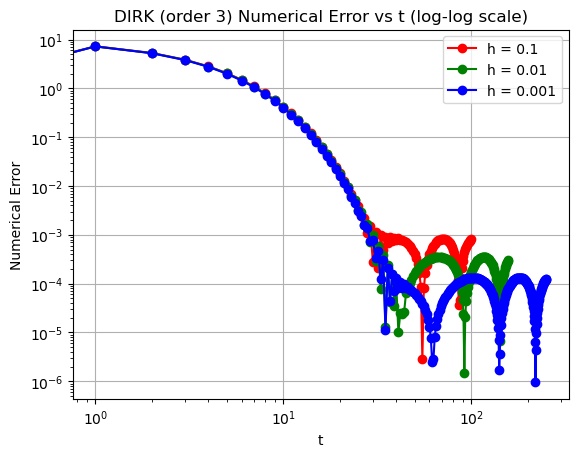

In [12]:
# Set parameters
Tmax = 10
d = 5 / 24
# p_values = np.arange(1, 6+d, d, dtype=float)
p_values = np.arange(1, 3.2, 0.2)
h_values = 1/10**(p_values)

# Initialize arrays to store errors
errors = []

# Compute errors for different step sizes (order 3)
for h in h_values:
    t_values, y_numerical = solve_prothero_robinson_3(Tmax, h, 10**4, np.sin(np.pi/4) + 10)
    
    y_exact = exact_solution(t_values, np.sin(np.pi/4) + 10 , 10**4)
    error = np.abs(y_numerical - y_exact)
    errors.append(error)

# Plot the numerical error vs h in log-log scale
plt.loglog(np.arange(len(errors[0])), (errors[0]), marker='o', linestyle='-', color='r', label='h = 0.1')
plt.loglog(np.arange(len(errors[1])), (errors[1]), marker='o', linestyle='-', color='g', label='h = 0.01')
plt.loglog(np.arange(len(errors[2])), (errors[2]), marker='o', linestyle='-', color='b', label='h = 0.001')

# Compute corresponding errors for slopes 1 and 2
C1 = 10**(-7)
C2 = 10
error_C1 = C1 * h_values
error_C2 = C2 * h_values**2
# plt.loglog(h_values, error_C1, linestyle='--', color='gray', label='slope 1')
# plt.loglog(h_values, error_C2, linestyle='-.', color='gray', label='slope 2')

plt.xlabel('t')
plt.ylabel('Numerical Error')
plt.title('DIRK (order 3) Numerical Error vs t (log-log scale)')
plt.legend()
plt.grid(True)

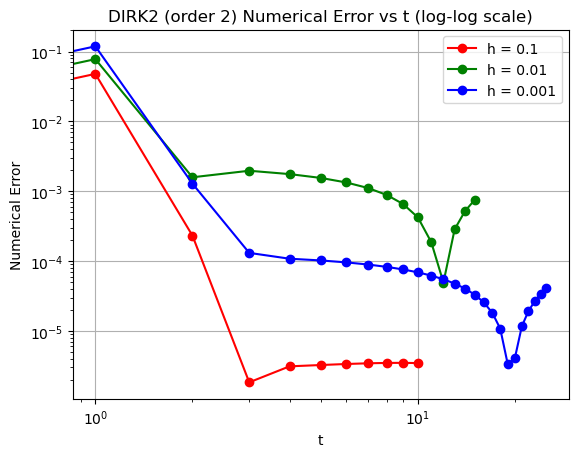

In [9]:
# Set parameters
Tmax = 1
d = 5 / 24
# p_values = np.arange(1, 6+d, d, dtype=float)
p_values = np.arange(1, 3.2, 0.2)
h_values = 1/10**(p_values)

# Initialize arrays to store errors
errors = []

# Compute errors for different step sizes (order 2)
for h in h_values:
    t_values, y_numerical = solve_prothero_robinson(Tmax, h, 10**4, np.sin(np.pi/4) + 10)
    
    y_exact = exact_solution(t_values, np.sin(np.pi/4) + 10 , 10**4)
    error = np.abs(y_numerical - y_exact)
#     error = compute_error(t_values, y_numerical, 10**4)
    errors.append(error)

# Plot the numerical error vs h in log-log scale
plt.loglog(np.arange(len(errors[0])), (errors[0]), marker='o', linestyle='-', color='r', label='h = 0.1')
plt.loglog(np.arange(len(errors[1])), (errors[1]), marker='o', linestyle='-', color='g', label='h = 0.01')
plt.loglog(np.arange(len(errors[2])), (errors[2]), marker='o', linestyle='-', color='b', label='h = 0.001')

# Compute corresponding errors for slopes 1 and 2
C1 = 10**(-7)
C2 = 10
error_C1 = C1 * h_values
error_C2 = C2 * h_values**2
# plt.loglog(h_values, error_C1, linestyle='--', color='gray', label='slope 1')
# plt.loglog(h_values, error_C2, linestyle='-.', color='gray', label='slope 2')

plt.xlabel('t')
plt.ylabel('Numerical Error')
plt.title('DIRK2 (order 2) Numerical Error vs t (log-log scale)')
plt.legend()
plt.grid(True)

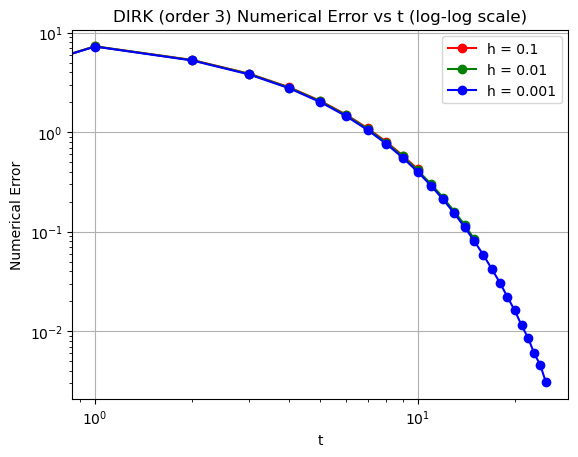

In [10]:
# Set parameters
Tmax = 1
d = 5 / 24
# p_values = np.arange(1, 6+d, d, dtype=float)
p_values = np.arange(1, 3.2, 0.2)
h_values = 1/10**(p_values)

# Initialize arrays to store errors
errors = []

# Compute errors for different step sizes (order 3)
for h in h_values:
    t_values, y_numerical = solve_prothero_robinson_3(Tmax, h, 10**4, np.sin(np.pi/4) + 10)
    
    y_exact = exact_solution(t_values, np.sin(np.pi/4) + 10 , 10**4)
    error = np.abs(y_numerical - y_exact)
    errors.append(error)

# Plot the numerical error vs h in log-log scale
plt.loglog(np.arange(len(errors[0])), (errors[0]), marker='o', linestyle='-', color='r', label='h = 0.1')
plt.loglog(np.arange(len(errors[1])), (errors[1]), marker='o', linestyle='-', color='g', label='h = 0.01')
plt.loglog(np.arange(len(errors[2])), (errors[2]), marker='o', linestyle='-', color='b', label='h = 0.001')

# Compute corresponding errors for slopes 1 and 2
C1 = 10**(-7)
C2 = 10
error_C1 = C1 * h_values
error_C2 = C2 * h_values**2
# plt.loglog(h_values, error_C1, linestyle='--', color='gray', label='slope 1')
# plt.loglog(h_values, error_C2, linestyle='-.', color='gray', label='slope 2')

plt.xlabel('t')
plt.ylabel('Numerical Error')
plt.title('DIRK (order 3) Numerical Error vs t (log-log scale)')
plt.legend()
plt.grid(True)